In [1]:
#The path file assumes you have a directory structure with cmdstanpy sitting at the top with subdirectories 
from paths import *

The route directory: direc: C:\Users\n_1ho\Documents\biodiversity_model_final_kelvin\cmdstanpy\
Will get code from: codepath: C:\Users\n_1ho\Documents\biodiversity_model_final_kelvin\cmdstanpy\code
Will send code to: outpath: C:\Users\n_1ho\Documents\biodiversity_model_final_kelvin\cmdstanpy\output
If data is needed it will look in: datapath:  C:\Users\n_1ho\Documents\biodiversity_model_final_kelvin\cmdstanpy\datamerged


In [2]:
import cmdstanpy
from cmdstanpy import CmdStanModel
from stancodes import *  #This file is in the code directory, is in the code directory

In [3]:
#Compile the HB stan code, will only do this once
stan_file = join(codepath,'HBL2.stan')
model = CmdStanModel(stan_file=stan_file)

In [4]:
sys.path.append(datapath)
from bio3loadindata3 import *

In [5]:
x = [array(X0_all), array(X1_all), array(X2_all)]
#for i in range(3):
#     x[i][:,1:-1] = x[i][:,1:-1] / 60
#     x[i][:,0] = x[i][:,0] / 5

In [6]:
x[1]

array([[-0.01      ,  0.75      ,  0.75      , ...,  0.25      ,
         0.        ,  0.        ],
       [-1.        ,  0.41666667,  1.        , ...,  0.75      ,
         1.        ,  0.        ],
       [-0.4       ,  0.        ,  0.25      , ...,  1.        ,
         0.41666667,  0.        ],
       ...,
       [-0.05      ,  0.75      ,  0.16666667, ...,  0.        ,
         0.        ,  0.        ],
       [-1.        ,  0.        ,  0.        , ...,  0.        ,
         0.75      ,  0.        ],
       [-1.        ,  0.        ,  0.58333333, ...,  0.        ,
         1.        ,  0.        ]])

In [7]:
Y = y  # already y30 and y30AD concatenated and +1 shifted
ids = id_all  # merged respondent IDs
N = int(max(ids))
T = len(Y)
K = x[0].shape[1]
[N, T, K]

[402, 3216, 7]

In [8]:
frame(x[1])

,0,1,2,3,4,5,6
0,-0.01,0.750000,0.750000,1.000000,0.250000,0.000000,0.0
1,-1.00,0.416667,1.000000,0.416667,0.750000,1.000000,0.0
2,-0.40,0.000000,0.250000,1.000000,1.000000,0.416667,0.0
3,-0.10,0.166667,0.000000,0.250000,1.000000,0.750000,0.0
4,-1.00,0.583333,0.166667,0.750000,0.416667,0.250000,0.0
...,...,...,...,...,...,...,...
3211,-1.00,0.000000,1.000000,0.000000,0.583333,0.000000,0.0
3212,-0.10,0.000000,0.000000,0.250000,0.000000,1.000000,0.0
3213,-0.05,0.750000,0.166667,0.000000,0.000000,0.000000,0.0
3214,-1.00,0.000000,0.000000,0.166667,0.000000,0.750000,0.0


In [9]:
beta_mean=[0,0,0,0,0]    #prior mean for the wtp parameters
alpha_mean=0                 #prior mean for the scale parameters : note that this is the log or the scale
theta_mean=0                 #prior mean for the opt-out parameters

s=.3
beta_sigma=[s,s,s,s,s]     #prior std for the mean of beta   -wtps
alpha_sigma=1              #prior std for the mean if alpha -scale
theta_sigma=s              #prior std for the mean of theta -opt out

t=0.05
a=[1,1,1,1,1]              #These are gammma priors for the heterogeneous WTPs: 
b=[t,t,t,t,t]       #These are gammma priors for the heterogeneous WTPs: note that mean=a/b and var =a/b**2
a_alpha=1; b_alpha=t;         #These are gammma priors for the heterogeneous scale parameter
a_theta=1; b_theta=t;         #These are gammma priors for the heterogeneous opt out parameters

hdata = {'M': 3, 'N': N, 'K':K, 'T': rows(Y) , 'y': Y, 'ids': ids, 'x':x, 
         'beta_mean':beta_mean,'beta_sigma':beta_sigma,
         'alpha_mean':alpha_mean,'alpha_sigma':alpha_sigma,
         'theta_mean':theta_mean,'theta_sigma':theta_sigma,
         'a':a,'b':b,'a_alpha':a_alpha,'b_alpha':b_alpha,'a_theta':a_theta,'b_theta':b_theta, 
         'lower_precision_beta_ivar':  1, #The larger these are the greater the hommogeneity enforced
         'lower_precision_alpha_ivar': 1, #The larger these are the greater the hommogeneity enforced
         'lower_precision_theta_ivar': 1, #The larger these are the greater the hommogeneity enforced
         'lower_beta_bound':-1,           #If the parameters exceed this then this attributes wtp exceeds the largest payment
         'upper_beta_bound': 1,
         'lower_theta_bound':-1,
         'upper_theta_bound':1}

In [10]:
#Out of interest get the maximum likelihood estimates of beta_mu
import time
start=time.time()
mle = model.optimize(data=hdata)
q=mle.stan_variables()
end=time.time()
print('time taken in mins', (end-start)/60,'seconds', end-start)
#q['beta']

15:12:20 - cmdstanpy - INFO - Chain [1] start processing
15:12:31 - cmdstanpy - INFO - Chain [1] done processing
15:12:31 - cmdstanpy - WARNING - The default behavior of CmdStanMLE.stan_variable() will change in a future release to always return a numpy.ndarray, even for scalar variables.
15:12:31 - cmdstanpy - WARNING - The default behavior of CmdStanMLE.stan_variable() will change in a future release to always return a numpy.ndarray, even for scalar variables.
15:12:31 - cmdstanpy - WARNING - The default behavior of CmdStanMLE.stan_variable() will change in a future release to always return a numpy.ndarray, even for scalar variables.
15:12:31 - cmdstanpy - WARNING - The default behavior of CmdStanMLE.stan_variable() will change in a future release to always return a numpy.ndarray, even for scalar variables.
15:12:31 - cmdstanpy - WARNING - The default behavior of CmdStanMLE.stan_variable() will change in a future release to always return a numpy.ndarray, even for scalar variables.
15

time taken in mins 0.18625584840774537 seconds 11.175350904464722


In [11]:
#Here we are going to use pathfinder to get some starting points
from cmdstanpy.model import cmdstan_path
pathfinder = model.pathfinder(data=hdata)

15:12:34 - cmdstanpy - INFO - Chain [1] start processing
15:18:15 - cmdstanpy - INFO - Chain [1] done processing


In [12]:
#We are going to run 6 chains
chains=6
pathfinder_inits = pathfinder.create_inits(chains=chains)

In [13]:
#Lets fit the model using the intitialiser from pathfinder
'''
A reminder of all the possible settings
sample(data=None, chains=None, parallel_chains=None, threads_per_chain=None, seed=None, chain_ids=None, inits=None, 
iter_warmup=None, iter_sampling=None, save_warmup=False, thin=None, max_treedepth=None, metric=None, 
step_size=None, adapt_engaged=True, adapt_delta=None, adapt_init_phase=None, adapt_metric_window=None, 
adapt_step_size=None, fixed_param=False, output_dir=None, sig_figs=None, save_latent_dynamics=False, 
save_profile=False, show_progress=True, show_console=False, refresh=None, time_fmt='%Y%m%d%H%M%S', 
timeout=None, *, force_one_process_per_chain=None)
'''
chains=6
start=time.time()
fit=model.sample(data=hdata, chains=chains,iter_warmup=1000, inits=pathfinder_inits,
                 iter_sampling=2000, show_progress=True,output_dir=None,thin=1,adapt_delta=.8,max_treedepth=14)
end=time.time()
print('time taken in mins', (end-start)/60,'seconds', end-start)

15:18:36 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

chain 5 |          | 00:00 Status

chain 6 |          | 00:00 Status

16:37:33 - cmdstanpy - INFO - CmdStan done processing.
16:37:33 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'HBL2.stan', line 94, column 4 to column 36)
Consider re-running with show_console=True if the above output is unclear!



time taken in mins 79.4271649479866 seconds 4765.629896879196


In [14]:
#fit.summary()

In [15]:
z=fit.stan_variables()

In [16]:
outpath='C:\\Users\\n_1ho\\Documents\\biodiversity_model_final_kelvin\\cmdstanpy\\output'  #if you want to change the output
savemodel(z,join(outpath,'z_niko30_30AD_rescaled_priorbeta_theta_lb_ub_20251008'))

In [17]:
outpath='C:\\Users\\n_1ho\\Documents\\biodiversity_model_final_kelvin\\cmdstanpy\\output'  #if the outpath was change
z=loadmodel(join(outpath,'z_niko30_30AD_rescaled_priorbeta_theta_lb_ub_20251008'))


<Axes: title={'center': 'Opt Out ASC'}>

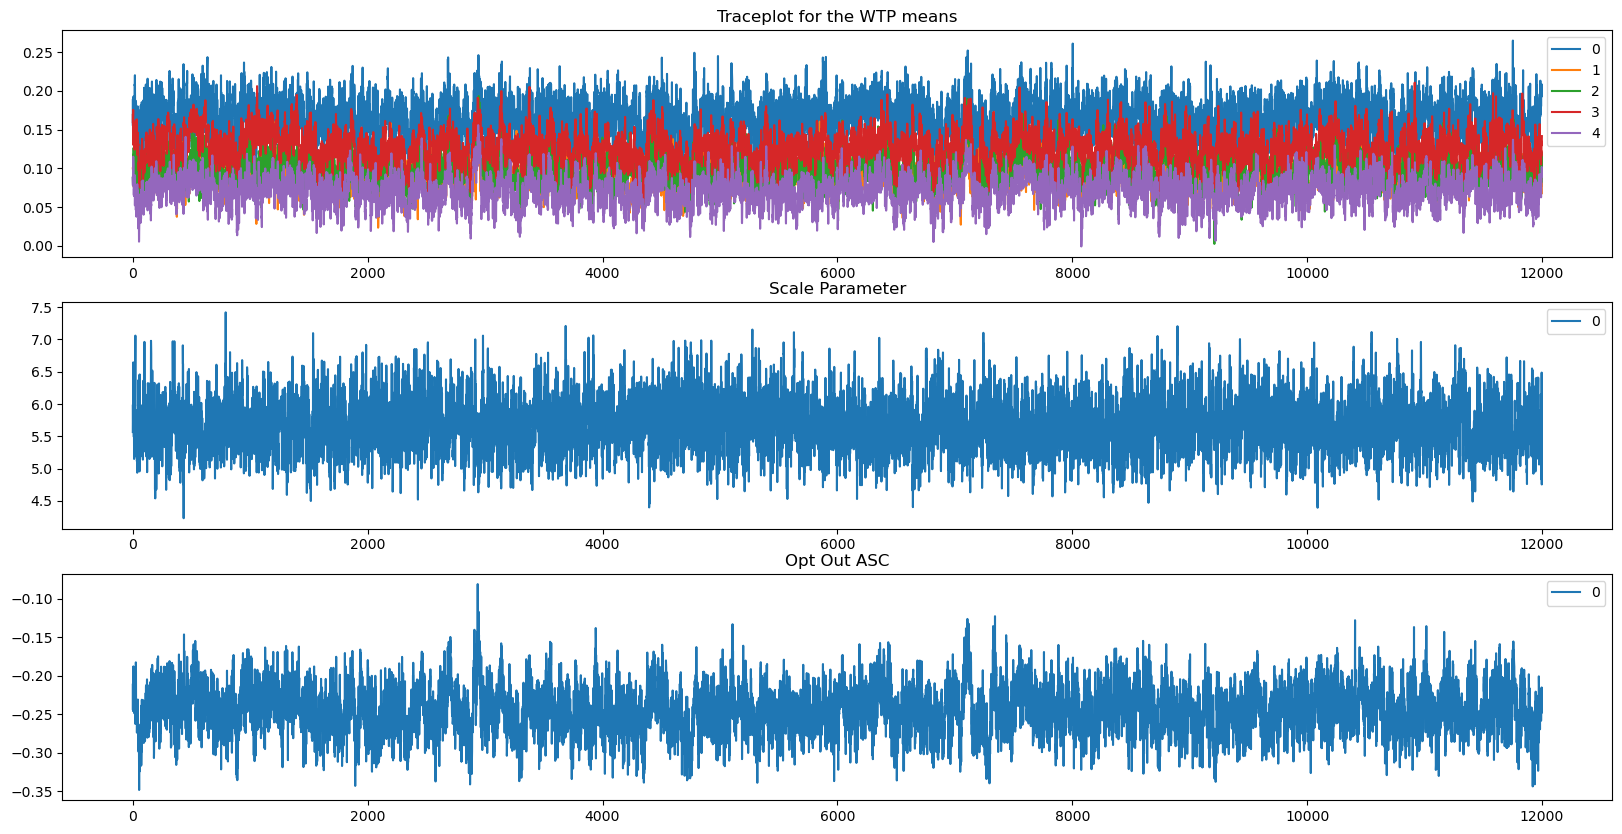

In [18]:
from shortercuts import pltsize
pltsize(10,20)
fig,ax=plt.subplots(3)
frame(z['beta_mu']).plot(title='Traceplot for the WTP means',ax=ax[0])
frame(exp(z['alpha_mu'])).plot(ax=ax[1],title='Scale Parameter')
frame(z['theta_mu']).plot(ax=ax[2],title='Opt Out ASC')

In [19]:
#print(fit.diagnose())

In [20]:
beta_mu=(5/60)*100*frame(z['beta_mu'])
theta_mu= 5*100*frame(z['theta_mu'])
beta_mu.columns=['bees','sparrow','butterflies','hedgehogs','bats']
varnames=beta_mu.columns

cc([beta_mu.describe(),theta_mu.describe()]).round(2)


,bees,sparrow,butterflies,hedgehogs,bats,0
count,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00
mean,1.38,0.76,0.82,1.06,0.59,-122.10
std,0.20,0.15,0.17,0.17,0.16,15.84
min,0.64,0.19,0.02,0.46,-0.01,-174.11
25%,1.25,0.67,0.71,0.95,0.48,-132.83
50%,1.38,0.76,0.82,1.06,0.59,-122.38
75%,1.52,0.86,0.93,1.17,0.70,-111.47
max,2.21,1.34,1.61,1.76,1.30,-40.36


In [21]:
beta_mu= 5*100*frame(z['beta_mu'])
theta_mu= 5*100*frame(z['theta_mu'])
beta_mu.columns=['bees','sparrow','butterflies','hedgehogs','bats']
varnames=beta_mu.columns

cc([beta_mu.describe(),theta_mu.describe()]).round(2)

,bees,sparrow,butterflies,hedgehogs,bats,0
count,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00
mean,83.09,45.79,49.46,63.68,35.38,-122.10
std,12.05,8.72,10.12,10.04,9.61,15.84
min,38.20,11.66,1.20,27.60,-0.45,-174.11
25%,74.92,40.02,42.59,56.92,29.01,-132.83
50%,82.97,45.68,49.38,63.46,35.31,-122.38
75%,91.41,51.56,56.09,70.36,41.79,-111.47
max,132.46,80.35,96.63,105.31,77.87,-40.36


In [22]:
# 95% credible intervals (2.5% and 97.5%)
beta_ci = beta_mu.quantile([0.025, 0.975]).T
theta_ci = theta_mu.quantile([0.025, 0.975]).T

# Rename columns for clarity
beta_ci.columns = ['2.5%', '97.5%']
theta_ci.columns = ['2.5%', '97.5%']

# Round and display
print("Credible Intervals for beta_mu:")
print(beta_ci.round(2))
print("\nCredible Intervals for theta_mu:")
print(theta_ci.round(2))

Credible Intervals for beta_mu:
              2.5%   97.5%
bees         59.55  106.40
sparrow      28.64   63.18
butterflies  29.96   69.64
hedgehogs    44.49   83.99
bats         16.72   54.42

Credible Intervals for theta_mu:
    2.5%  97.5%
0 -152.7 -90.64


<Axes: title={'center': 'WTP  to avoid SQ'}, ylabel='Frequency'>

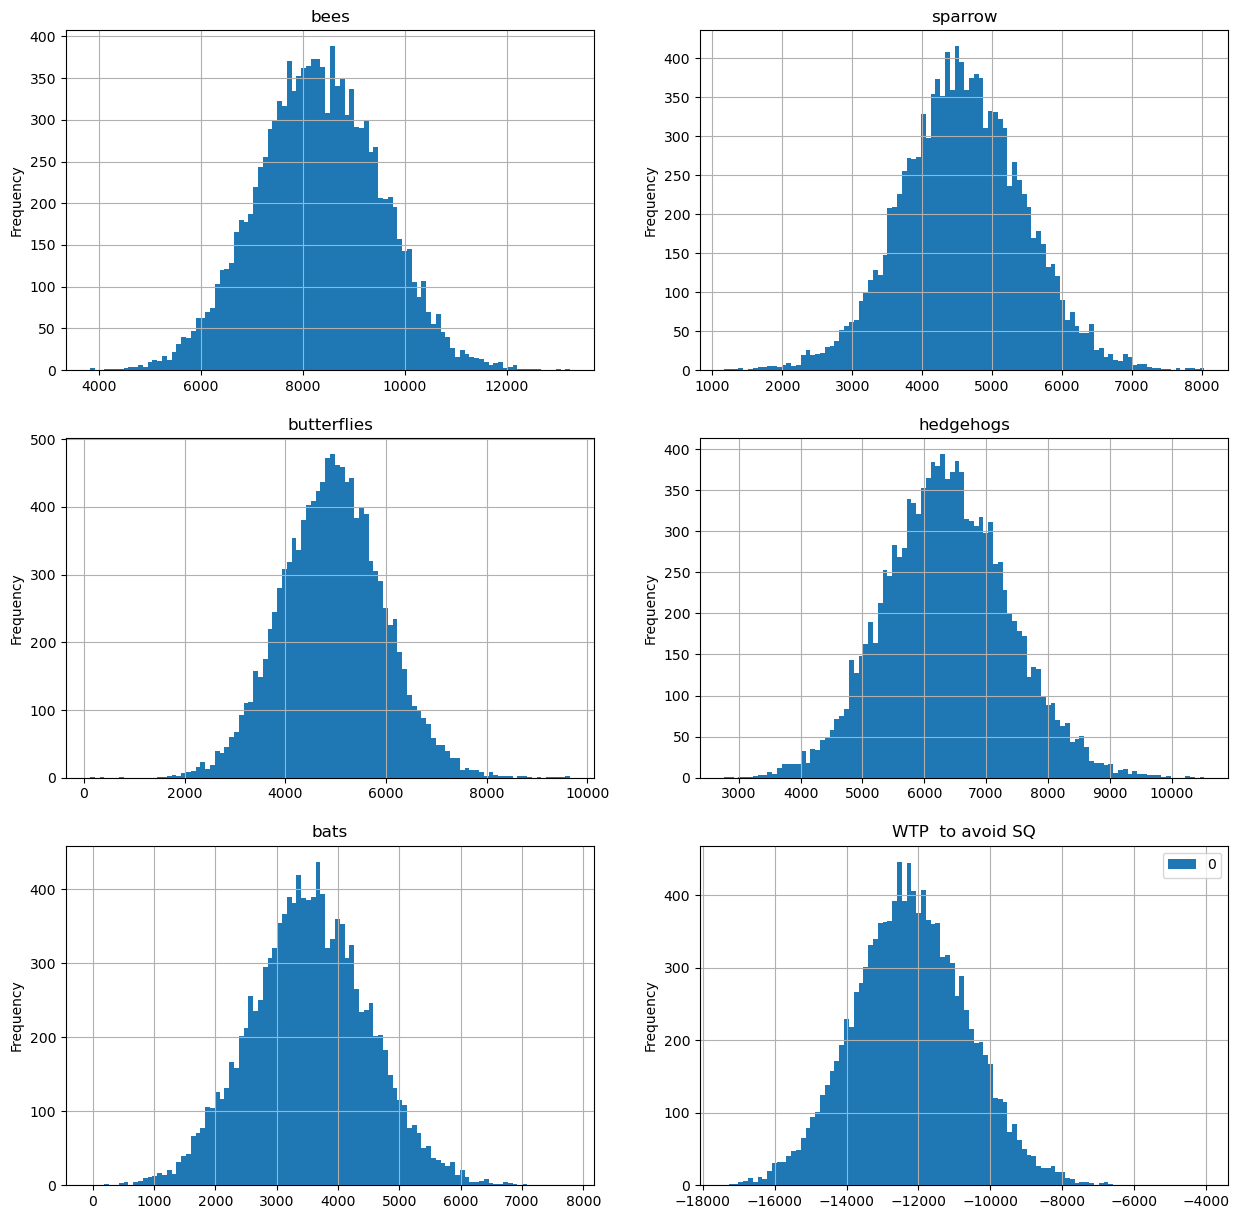

In [23]:
pltsize(15,15)
fig,ax=plt.subplots(3,2)
scale=100
(scale*beta_mu[varnames[0]]).plot(kind='hist',bins=100,ax=ax[0,0],title=varnames[0],grid=True)
(scale*beta_mu[varnames[1]]).plot(kind='hist',bins=100,ax=ax[0,1],title=varnames[1],grid=True)

(scale*beta_mu[varnames[2]]).plot(kind='hist',bins=100,ax=ax[1,0],title=varnames[2],grid=True)
(scale*beta_mu[varnames[3]]).plot(kind='hist',bins=100,ax=ax[1,1],title=varnames[3],grid=True)
(scale*beta_mu[varnames[4]]).plot(kind='hist',bins=100,ax=ax[2,0],title=varnames[4],grid=True)
(scale*theta_mu).plot(kind='hist',grid=True,bins=100,ax=ax[2,1],title='WTP  to avoid SQ')


In [24]:
#If you want the rhat values for beta_my which is a two dimensional array, 
r_hat2(z,'beta_mu',chains)

(12000, 5)


[['beta_mu', 1, 1.0046355142881684],
 ['beta_mu', 2, 1.004390059286238],
 ['beta_mu', 3, 1.0042432281932918],
 ['beta_mu', 4, 1.0137014292904347],
 ['beta_mu', 5, 1.0082531339325995]]

In [25]:
r_hat1(z,'alpha_mu',chains)

(12000,)


['alpha_mu', 1.0027630747912863]

In [26]:
w=WAICf(z['log_lik']) 
#Look at the WAIC, note that my WAIC (produced here) gives the same results canned software for simple models
#However, I have had some divergences for some more complex models, though I am not sure why

In [27]:
#print WAIC
print(f"WAIC: {w}")

WAIC: (          waic         elpd     p_waic1     p_waic2    maxloglik    se_waic
0  4468.279178 -2234.139589  454.762758  571.233177 -1758.961871  68.768619, array([[-1.12196387],
       [-0.96776215],
       [-1.27643088],
       ...,
       [-1.63076777],
       [-0.82907038],
       [-0.572228  ]]))


In [28]:
import arviz as az

#  pointwise log-likelihood saved in fit
loo_result = az.loo(fit)
print(loo_result)

Computed from 12000 posterior samples and 3216 observations log-likelihood matrix.

         Estimate       SE
elpd_loo -2325.49    36.88
p_loo      662.59        -

There has been a warning during the calculation. Please check the results.
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.70]   (good)     2897   90.1%
   (0.70, 1]   (bad)       317    9.9%
   (1, Inf)   (very bad)    2    0.1%



In [29]:
betas=[]
for k in range(shape(z['beta'])[2]):
    beta1=[]
    for i in range(shape(z['beta'])[1]):
        beta1+=[float(z['beta'][:,i,k].mean())]
    betas+=[beta1]
betas=(500/60)*frame(betas) .T
betas.columns=beta_mu.columns
#betas

<Axes: ylabel='Frequency'>

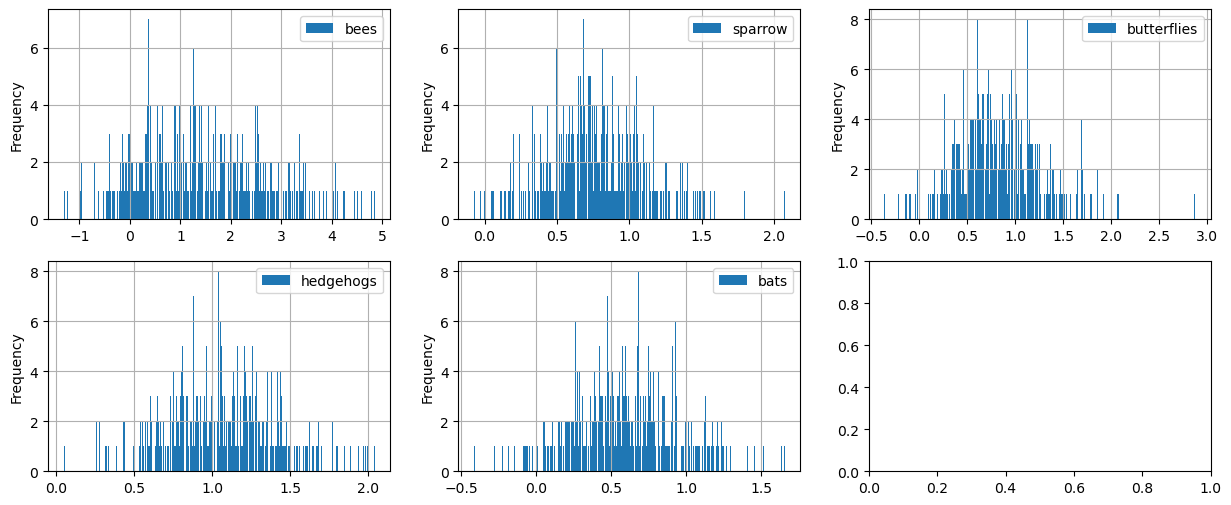

In [30]:
pltsize(6,15)
fig,ax=plt.subplots(2,3)
['bees','sparrow','butterflies','hedgehogs','bats']
betas.plot(kind='hist',y='bees',bins=383,ax=ax[0,0],grid=True)
betas.plot(kind='hist',y='sparrow',bins=383,ax=ax[0,1],grid=True)
betas.plot(kind='hist',y='butterflies',bins=383,ax=ax[0,2],grid=True)
betas.plot(kind='hist',y='hedgehogs',bins=383,ax=ax[1,0],grid=True)
betas.plot(kind='hist',y='bats',bins=383,ax=ax[1,1],grid=True)


In [31]:
exp(1)

2.718281828459045

In [32]:
exp(1+1/2)

4.4816890703380645

In [33]:
ids.plot()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

In [34]:
x[0]

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [35]:
x[2]

array([[-0.05      ,  0.16666667,  0.41666667, ...,  1.        ,
         0.75      ,  0.        ],
       [-1.        ,  0.        ,  0.41666667, ...,  0.25      ,
         0.25      ,  0.        ],
       [-1.        ,  1.        ,  0.75      , ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [-0.4       ,  0.        ,  0.        , ...,  0.58333333,
         0.        ,  0.        ],
       [-0.6       ,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.4       ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ]])

In [36]:
print(z['beta_mu'].shape)

(12000, 5)


In [37]:
print(100 * beta_mu.describe())

               bees       sparrow   butterflies     hedgehogs          bats
count  1.200000e+06  1.200000e+06  1.200000e+06  1.200000e+06  1.200000e+06
mean   8.308542e+03  4.579378e+03  4.945870e+03  6.368151e+03  3.537753e+03
std    1.205437e+03  8.717212e+02  1.012097e+03  1.004072e+03  9.610678e+02
min    3.819625e+03  1.166160e+03  1.197570e+02  2.760430e+03 -4.517825e+01
25%    7.491712e+03  4.002302e+03  4.258750e+03  5.691662e+03  2.901060e+03
50%    8.297200e+03  4.568235e+03  4.938435e+03  6.345700e+03  3.531352e+03
75%    9.141288e+03  5.155712e+03  5.609100e+03  7.035825e+03  4.179089e+03
max    1.324620e+04  8.035400e+03  9.663000e+03  1.053140e+04  7.787150e+03


In [38]:
print(100 * theta_mu.describe())


                  0
count  1.200000e+06
mean  -1.220950e+04
std    1.583892e+03
min   -1.741130e+04
25%   -1.328331e+04
50%   -1.223767e+04
75%   -1.114719e+04
max   -4.036015e+03


In [39]:
print(z['beta_mu'].shape)
print(frame(z['beta_mu']).shape)
print(beta_mu.shape)

(12000, 5)
(12000, 5)
(12000, 5)


In [40]:
print(frame(z['beta_mu']).head())

          0         1         2         3         4
0  0.156315  0.099882  0.087500  0.168941  0.088304
1  0.189283  0.099187  0.083934  0.158282  0.077837
2  0.145222  0.097107  0.078299  0.172567  0.103492
3  0.170653  0.089451  0.097054  0.175505  0.112992
4  0.168440  0.083078  0.113732  0.157200  0.114980


In [41]:
print(len(y30), len(y30AD))

1608 1608


In [42]:
print("df1 attribute ranges:")
print(df1.round(3))

print("df2 attribute ranges:")
print(df2.round(3))

df1 attribute ranges:
bees1           60.0
sparrows1       60.0
butterflies1    60.0
hedgehogs1      60.0
bats1           60.0
tax1             1.0
dtype: float64
df2 attribute ranges:
bees2           60.0
sparrows2       60.0
butterflies2    60.0
hedgehogs2      60.0
bats2           60.0
tax2             1.0
dtype: float64


In [43]:
df1.index = ['bees', 'sparrows', 'butterflies', 'hedgehogs', 'bats', 'tax']
df2.index = ['bees', 'sparrows', 'butterflies', 'hedgehogs', 'bats', 'tax']
ratio = df2 / df1
print(ratio)

bees           1.0
sparrows       1.0
butterflies    1.0
hedgehogs      1.0
bats           1.0
tax            1.0
dtype: float64
